<a href="https://colab.research.google.com/github/vaishnavi123-cOde/iiit-summer-internship/blob/main/cards_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics --upgrade -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.6 MB/s eta 0:00:00


In [2]:
!ls



'detecting playing cards.v1i.yolov8.zip'   sample_data


In [3]:
!unzip -q "detecting playing cards.v1i.yolov8.zip" -d data
!ls data


data.yaml  README.dataset.txt  README.roboflow.txt  test  train


In [4]:
!cat data/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 6
names: ['ace', 'jack', 'king', 'nine', 'queen', 'ten']

roboflow:
  workspace: objectdetection-0gomq
  project: detecting-playing-cards-baghq
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/objectdetection-0gomq/detecting-playing-cards-baghq/dataset/1

In [5]:
yaml_content = """
train: data/train/images
val: data/test/images
nc: 6
names: ['Ace', 'King', 'Queen', 'Jack', 'Number_card', 'Card_Back']
"""

with open("data/data.yaml", "w") as f:
    f.write(yaml_content)


In [7]:
yaml_content = """
train: train/images
val: test/images
nc: 6
names: ['Ace', 'King', 'Queen', 'Jack', 'Number_card', 'Card_Back']
"""

with open("data/data.yaml", "w") as f:
    f.write(yaml_content)


In [8]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  # or yolov8s.pt for stronger accuracy

model.train(
    data="data/data.yaml",
    epochs=30,
    imgsz=640,
    name="card_detector"
)


Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=card_detector2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

100%|██████████| 755k/755k [00:00<00:00, 107MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,012,018 parameters, 3,012,002 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 372MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1845.2±564.3 MB/s, size: 74.2 KB)


train: Scanning /content/data/train/labels... 416 images, 0 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:00<00:00, 2515.50it/s]

train: New cache created: /content/data/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 592.1±396.1 MB/s, size: 68.5 KB)


val: Scanning /content/data/test/labels... 67 images, 0 backgrounds, 0 corrupt: 100%|██████████| 67/67 [00:00<00:00, 1010.97it/s]

val: New cache created: /content/data/test/labels.cache


Plotting labels to runs/detect/card_detector2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/card_detector2
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30       2.1G      0.622      3.167      1.052         56        640: 100%|██████████| 26/26 [00:09<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all         67        143    0.00843          1      0.242      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.58G     0.6666      2.298      1.069         60        640: 100%|██████████| 26/26 [00:06<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.48it/s]

                   all         67        143      0.479      0.644      0.511      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30       2.6G     0.6377      1.905      1.044         45        640: 100%|██████████| 26/26 [00:07<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         67        143      0.478       0.74      0.516      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.61G      0.616      1.748      1.016         61        640: 100%|██████████| 26/26 [00:06<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         67        143      0.418       0.77      0.565      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.63G     0.6227      1.662      1.005         66        640: 100%|██████████| 26/26 [00:05<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]

                   all         67        143      0.454      0.782      0.592      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.65G     0.6108       1.54          1         59        640: 100%|██████████| 26/26 [00:07<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         67        143      0.479      0.805      0.663       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.66G     0.6238      1.483      1.007         53        640: 100%|██████████| 26/26 [00:05<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]

                   all         67        143      0.427      0.819      0.663      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.68G     0.5969      1.429     0.9956         58        640: 100%|██████████| 26/26 [00:06<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.08it/s]

                   all         67        143      0.694      0.798      0.791      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30       2.7G     0.5391      1.309     0.9545         59        640: 100%|██████████| 26/26 [00:07<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.22it/s]

                   all         67        143       0.74      0.825       0.83      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.71G     0.5501      1.227     0.9824         66        640: 100%|██████████| 26/26 [00:06<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         67        143      0.857      0.882      0.934      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.73G     0.5273      1.118     0.9528         52        640: 100%|██████████| 26/26 [00:07<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.44it/s]

                   all         67        143      0.816      0.876       0.91      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.75G     0.5257      1.074     0.9562         51        640: 100%|██████████| 26/26 [00:06<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]

                   all         67        143      0.847      0.804      0.924       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.77G     0.5109      1.012     0.9451         49        640: 100%|██████████| 26/26 [00:06<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all         67        143      0.915      0.911      0.978      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.78G     0.4965     0.9195     0.9406         54        640: 100%|██████████| 26/26 [00:07<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.64it/s]

                   all         67        143      0.917      0.881      0.966      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       2.8G     0.5007     0.9305      0.944         55        640: 100%|██████████| 26/26 [00:06<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.15it/s]

                   all         67        143      0.896      0.952      0.971      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.82G     0.4937     0.8802      0.945         55        640: 100%|██████████| 26/26 [00:07<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.57it/s]

                   all         67        143      0.922       0.93      0.973      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.83G     0.4644     0.8288     0.9248         62        640: 100%|██████████| 26/26 [00:06<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         67        143      0.924       0.93      0.973      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.85G     0.4818     0.8131     0.9375         49        640: 100%|██████████| 26/26 [00:06<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all         67        143      0.964      0.933      0.988      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.87G     0.4541     0.7696     0.9228         46        640: 100%|██████████| 26/26 [00:07<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.51it/s]

                   all         67        143      0.901      0.973      0.987      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.88G     0.4763     0.7514     0.9501         52        640: 100%|██████████| 26/26 [00:05<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.41it/s]

                   all         67        143      0.927      0.963      0.987      0.898


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30       2.9G     0.3572     0.7118      0.855         26        640: 100%|██████████| 26/26 [00:08<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         67        143      0.903      0.933      0.974       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.92G     0.3338     0.6508     0.8465         35        640: 100%|██████████| 26/26 [00:06<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         67        143      0.975      0.947      0.984      0.906



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.94G     0.3416     0.6655     0.8577         36        640: 100%|██████████| 26/26 [00:05<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         67        143      0.962       0.95      0.982      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.95G     0.3327     0.5801     0.8426         24        640: 100%|██████████| 26/26 [00:07<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         67        143      0.938       0.95      0.978       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.97G     0.3265     0.5829     0.8453         30        640: 100%|██████████| 26/26 [00:05<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.29it/s]

                   all         67        143      0.953      0.964       0.99      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.99G     0.3303      0.547     0.8477         36        640: 100%|██████████| 26/26 [00:06<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         67        143      0.941       0.96      0.988      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         3G     0.3057     0.5128     0.8422         33        640: 100%|██████████| 26/26 [00:06<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.55it/s]

                   all         67        143      0.951      0.947      0.989       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      3.02G     0.3078     0.5164     0.8383         34        640: 100%|██████████| 26/26 [00:05<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.25it/s]

                   all         67        143      0.974      0.929      0.988      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      3.04G     0.3057      0.499     0.8358         25        640: 100%|██████████| 26/26 [00:06<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.74it/s]

                   all         67        143      0.966      0.943      0.984      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      3.06G     0.3002     0.4972     0.8412         37        640: 100%|██████████| 26/26 [00:05<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         67        143      0.968      0.951      0.984      0.925



30 epochs completed in 0.067 hours.
Optimizer stripped from runs/detect/card_detector2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/card_detector2/weights/best.pt, 6.2MB

Validating runs/detect/card_detector2/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,818 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.24it/s]


                   all         67        143      0.969      0.959      0.985      0.926
                   Ace         20         26       0.94      0.962      0.989      0.945
                  King         17         24      0.983          1      0.995      0.925
                 Queen         20         23      0.993      0.957      0.992      0.914
                  Jack         19         26      0.952      0.962      0.985      0.943
           Number_card         20         26          1      0.953      0.993       0.91
             Card_Back         15         18      0.943      0.919      0.956      0.917
Speed: 0.3ms preprocess, 2.9ms inference, 0.0ms loss, 5.5ms postprocess per image
Results saved to runs/detect/card_detector2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x785872780410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

In [10]:
!ls runs/detect/


card_detector  card_detector2


In [12]:
!find runs/ -name results.png


runs/detect/card_detector2/results.png


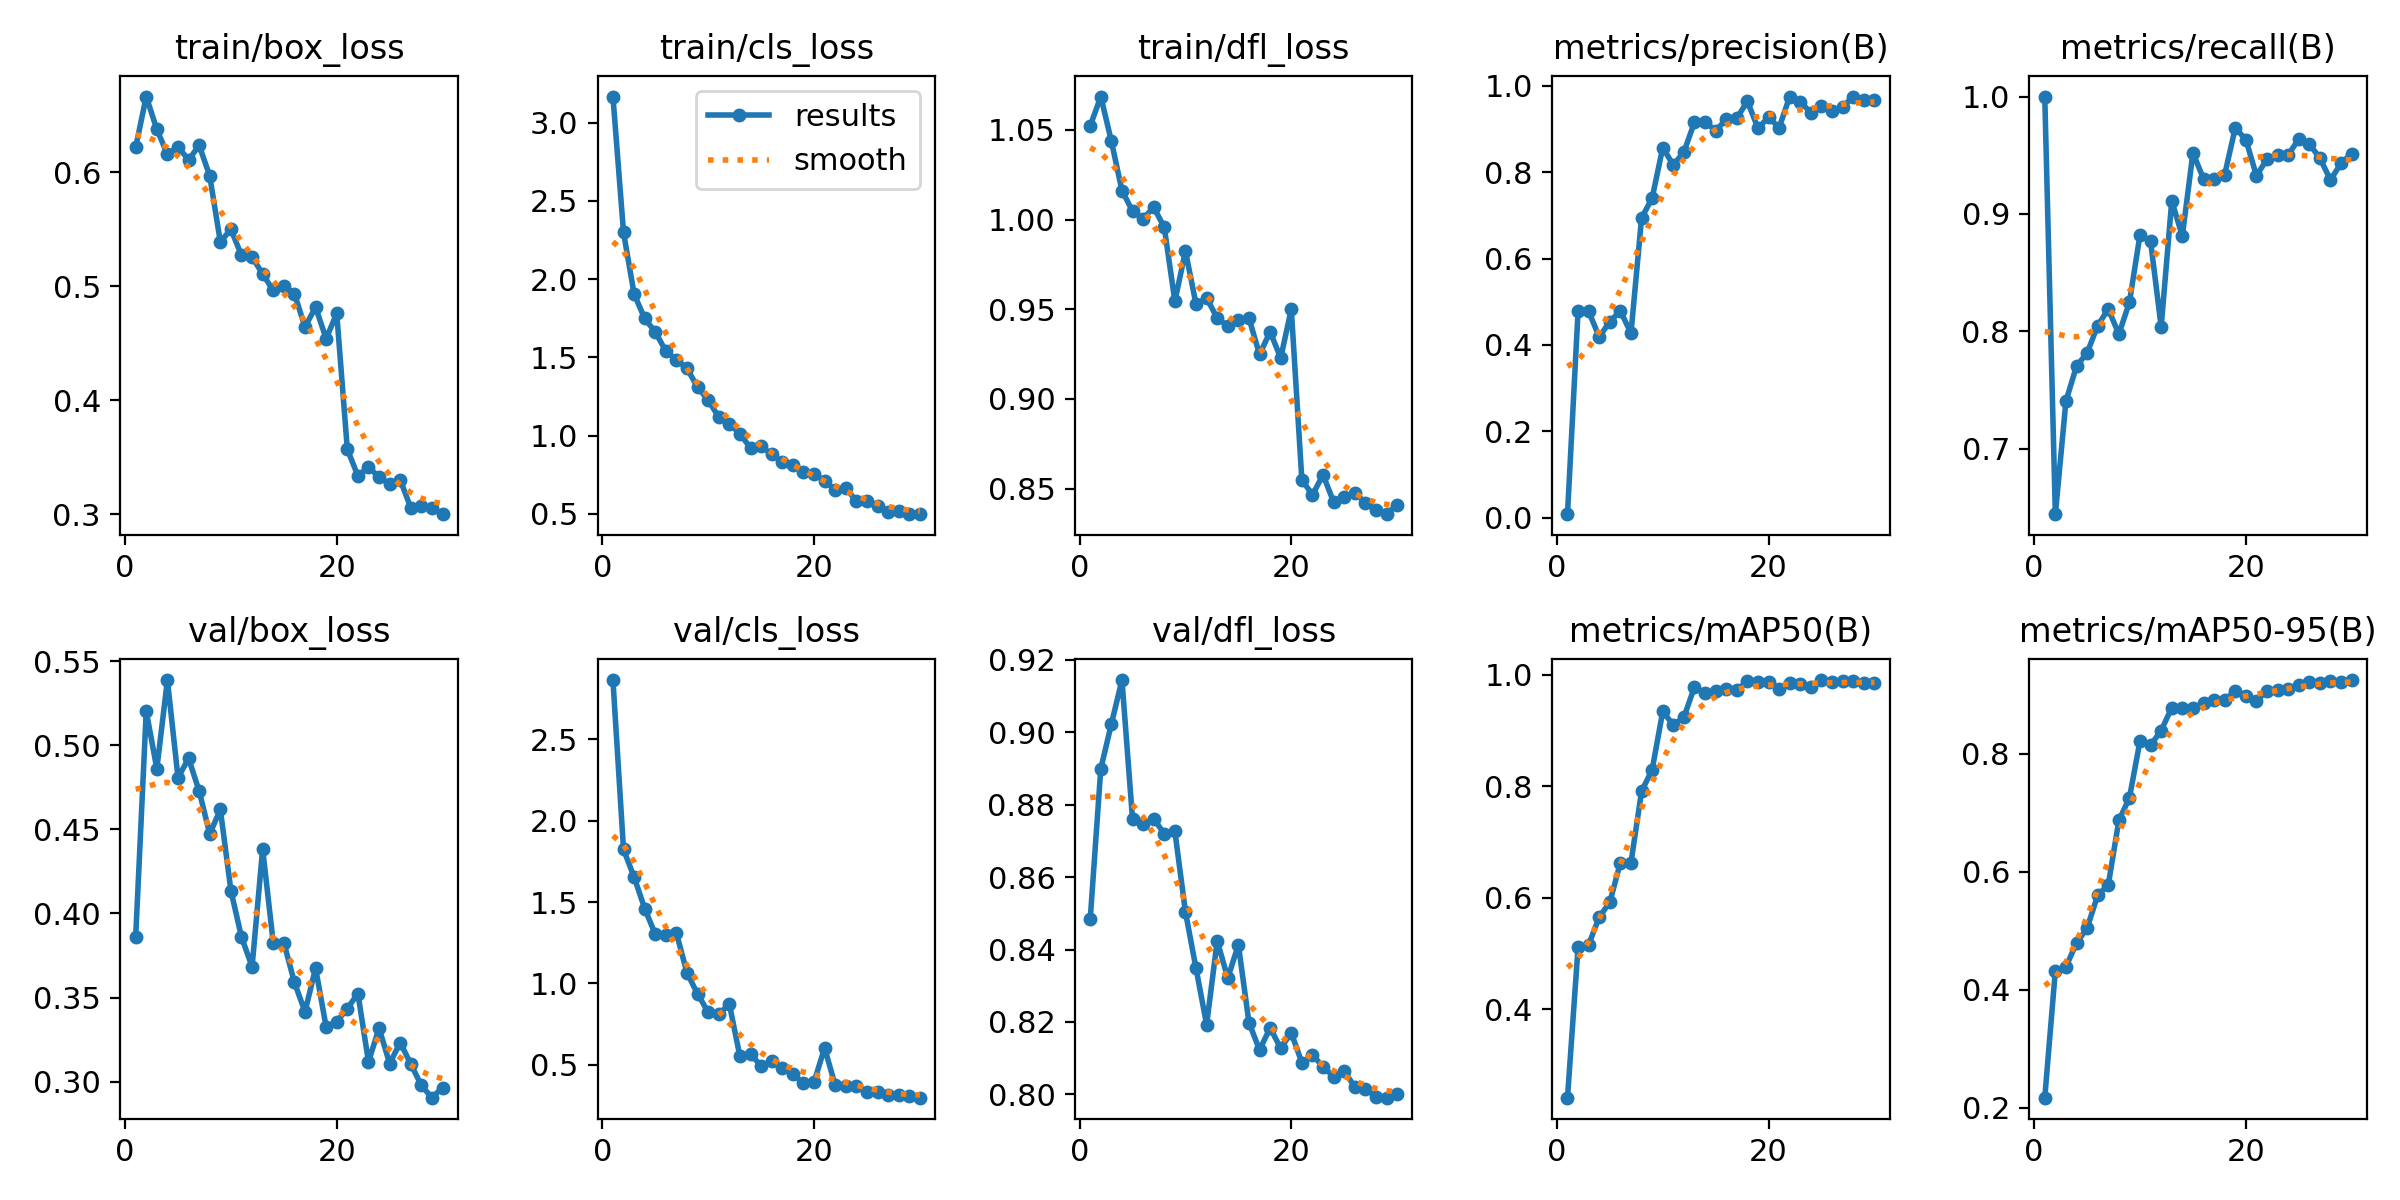

In [13]:
from IPython.display import Image
Image("runs/detect/card_detector2/results.png")


In [14]:
from ultralytics import YOLO

model = YOLO("runs/detect/card_detector2/weights/best.pt")
model.predict(source="data/test/images", save=True)



image 1/67 /content/data/test/images/IMG_2383_JPG.rf.41c34aab1e547301ff8723054cfbfd79.jpg: 640x640 1 Ace, 9.0ms
image 2/67 /content/data/test/images/IMG_2384_JPG.rf.10777549323ebf64ce942f4378a1b259.jpg: 640x640 1 Queen, 7.5ms
image 3/67 /content/data/test/images/IMG_2387_JPG.rf.02077a6b1d586d5034bf6cb3f4f07af0.jpg: 640x640 1 Number_card, 7.4ms
image 4/67 /content/data/test/images/IMG_2391_JPG.rf.929a0e68fd545e662a4e92822e9c72fd.jpg: 640x640 1 Jack, 7.4ms
image 5/67 /content/data/test/images/IMG_2395_JPG.rf.1c8f04b3c61b36f99cb06923929933be.jpg: 640x640 1 Card_Back, 7.4ms
image 6/67 /content/data/test/images/IMG_2403_JPG.rf.72980d15f768f1198fa81ab50738598e.jpg: 640x640 1 King, 7.4ms
image 7/67 /content/data/test/images/IMG_2432_JPG.rf.8006772203260f20345ebad1a696ec5b.jpg: 640x640 1 Card_Back, 7.4ms
image 8/67 /content/data/test/images/IMG_2433_JPG.rf.29ba305c61d556bae1381a3d15a87962.jpg: 640x640 1 Number_card, 7.4ms
image 9/67 /content/data/test/images/IMG_2435_JPG.rf.e879a64397bd06a1c7

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Ace', 1: 'King', 2: 'Queen', 3: 'Jack', 4: 'Number_card', 5: 'Card_Back'}
 obb: None
 orig_img: array([[[175, 187, 191],
         [169, 181, 185],
         [166, 178, 180],
         ...,
         [102, 126, 126],
         [ 99, 122, 124],
         [ 94, 119, 121]],
 
        [[176, 188, 192],
         [169, 181, 185],
         [161, 173, 175],
         ...,
         [ 79, 100, 101],
         [ 74,  97,  99],
         [ 81, 106, 108]],
 
        [[174, 187, 189],
         [166, 179, 181],
         [154, 166, 168],
         ...,
         [ 62,  82,  83],
         [ 57,  78,  80],
         [ 57,  80,  82]],
 
        ...,
 
        [[ 62,  84,  96],
         [ 75,  97, 109],
         [ 92, 114, 126],
         ...,
         [ 53,  79,  95],
         [ 52,  81,  96],
         [ 49,  78,  93]],
 
        [[ 64,  86,  98],
         [ 82, 104,

In [16]:
from ultralytics import YOLO

model = YOLO("runs/detect/card_detector2/weights/best.pt")
model.predict(source="data/test/images", save=True, name="predict_cards")



image 1/67 /content/data/test/images/IMG_2383_JPG.rf.41c34aab1e547301ff8723054cfbfd79.jpg: 640x640 1 Ace, 8.0ms
image 2/67 /content/data/test/images/IMG_2384_JPG.rf.10777549323ebf64ce942f4378a1b259.jpg: 640x640 1 Queen, 7.5ms
image 3/67 /content/data/test/images/IMG_2387_JPG.rf.02077a6b1d586d5034bf6cb3f4f07af0.jpg: 640x640 1 Number_card, 7.4ms
image 4/67 /content/data/test/images/IMG_2391_JPG.rf.929a0e68fd545e662a4e92822e9c72fd.jpg: 640x640 1 Jack, 12.4ms
image 5/67 /content/data/test/images/IMG_2395_JPG.rf.1c8f04b3c61b36f99cb06923929933be.jpg: 640x640 1 Card_Back, 7.4ms
image 6/67 /content/data/test/images/IMG_2403_JPG.rf.72980d15f768f1198fa81ab50738598e.jpg: 640x640 1 King, 7.4ms
image 7/67 /content/data/test/images/IMG_2432_JPG.rf.8006772203260f20345ebad1a696ec5b.jpg: 640x640 1 Card_Back, 7.5ms
image 8/67 /content/data/test/images/IMG_2433_JPG.rf.29ba305c61d556bae1381a3d15a87962.jpg: 640x640 1 Number_card, 7.4ms
image 9/67 /content/data/test/images/IMG_2435_JPG.rf.e879a64397bd06a1c

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Ace', 1: 'King', 2: 'Queen', 3: 'Jack', 4: 'Number_card', 5: 'Card_Back'}
 obb: None
 orig_img: array([[[175, 187, 191],
         [169, 181, 185],
         [166, 178, 180],
         ...,
         [102, 126, 126],
         [ 99, 122, 124],
         [ 94, 119, 121]],
 
        [[176, 188, 192],
         [169, 181, 185],
         [161, 173, 175],
         ...,
         [ 79, 100, 101],
         [ 74,  97,  99],
         [ 81, 106, 108]],
 
        [[174, 187, 189],
         [166, 179, 181],
         [154, 166, 168],
         ...,
         [ 62,  82,  83],
         [ 57,  78,  80],
         [ 57,  80,  82]],
 
        ...,
 
        [[ 62,  84,  96],
         [ 75,  97, 109],
         [ 92, 114, 126],
         ...,
         [ 53,  79,  95],
         [ 52,  81,  96],
         [ 49,  78,  93]],
 
        [[ 64,  86,  98],
         [ 82, 104,

In [17]:
!ls runs/detect/predict_cards/


cam_image2_jpg.rf.7636b73ca590f0092423e03041d62769.jpg
cam_image45_jpg.rf.cf8746d47b6099f767d099e5aa2e8312.jpg
cam_image4_jpg.rf.80e095048428c3b637b735698b31c63e.jpg
cam_image5_jpg.rf.5602722f17d585fdd4233d3547badd6d.jpg
cam_image6_jpg.rf.81e057bdaf66348069d6b0faf2981565.jpg
cam_image7_jpg.rf.29d0d8a95d1b215a921cb44ec3d140ba.jpg
cam_image8_jpg.rf.9b827f6097f152f0a4c3626f7eede4d8.jpg
IMG_2383_JPG.rf.41c34aab1e547301ff8723054cfbfd79.jpg
IMG_2384_JPG.rf.10777549323ebf64ce942f4378a1b259.jpg
IMG_2387_JPG.rf.02077a6b1d586d5034bf6cb3f4f07af0.jpg
IMG_2391_JPG.rf.929a0e68fd545e662a4e92822e9c72fd.jpg
IMG_2395_JPG.rf.1c8f04b3c61b36f99cb06923929933be.jpg
IMG_2403_JPG.rf.72980d15f768f1198fa81ab50738598e.jpg
IMG_2432_JPG.rf.8006772203260f20345ebad1a696ec5b.jpg
IMG_2433_JPG.rf.29ba305c61d556bae1381a3d15a87962.jpg
IMG_2435_JPG.rf.e879a64397bd06a1c789486e09e4df4f.jpg
IMG_2436_JPG.rf.78df6b0bd61d3adca573bce6b0bf3f39.jpg
IMG_2440_JPG.rf.21de1336130f5cf4778076715b4734da.jpg
IMG_2461_JPG.rf.dc1a46e36c68ff8

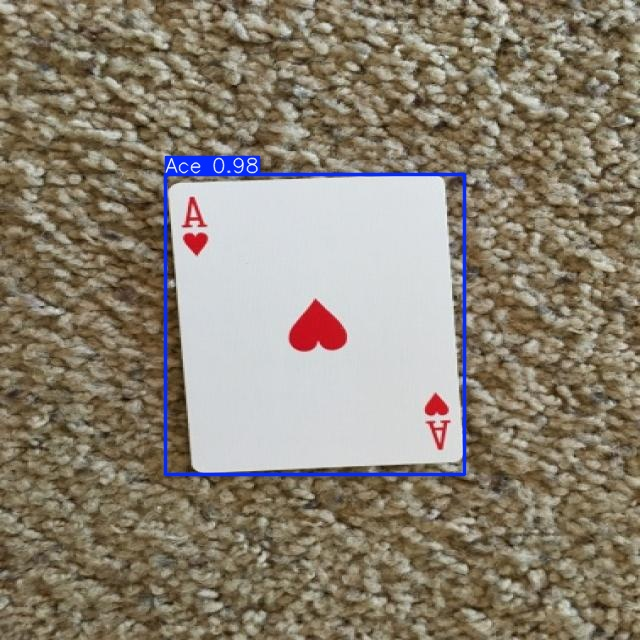

In [19]:
from IPython.display import Image
Image(filename="runs/detect/predict_cards/IMG_2383_JPG.rf.41c34aab1e547301ff8723054cfbfd79.jpg")
